# Data sets used 

All of the various mRS probability data sets are gathered here for time=0 and time=$T_0$, i.e. no effect time.

Any data sets containing mRS=6 (death) have the associated probability $P(mRS=6)$ removed, and the remaining values are normalised so that $P(mRS\leq5)=1.0$.

+ nLVO - non-large-vessel occlusion
+ LVO - large-vessel occlusion

Arrays are named using these strings:
+ `mrs_prob_dist` - mRS distribution
+ `mrs_prob_bins` - cumulative probabilities of `mrs_prob_dist`
+ `t0_treatment` and `no_treatment` - time $t=0$hr and the no-effect time $t=T_{NE}$. 

Plus more specific labels are appended. 

mRS distribution arrays used here:

| Description | $t=0$ | $t=T_{NE}$ (no treatment) | 
| :-- | :-- | :-- |
| Pre-stroke | The estimated pre-stroke mRS scores from SSNAP data, as used in the SAMueL-1 project. | N/A |
| Haemorrhaegic | N/A | _(yet to find)_ |
| nLVO & LVO combined | [Explained here](#nLVO-and-LVO-combined---t=0). Found by combining the no-effect time data (from the Lees+2010 no-treatment control group) with the odds ratio of mRS$\leq$1 at $t=1$hrs (from Emberson+2014). The mRS$\leq$1 data are combined to find P(mRS$\leq$1, $t$=0hr), and then this point is used to scale up an existing t=0 probability distribution (from ...???). | The no-treatment control group from Lees+2010. Although the numbers in the distribution are not listed in Lees+2010, they have been measured from Figure 1(?). |
| nLVO - untreated | N/A | [Explained here](#nLVO---untreated---time-of-no-effect). Weighted combination of `_no_treatment_Lees` (100%) and `_no_treatment_LVO` (40%), then further scaled to match $P(mRS<=1, t=T_0)=0.46$ from Holodinsky+2018. |
| nLVO - thrombolysis | [Explained here](#nLVO---thrombolysis). Weighted combination of `_t0_treatment_pre` (87%) and `_no_treatment_nLVO` (13%), where weights are chosen to match the $P(mRS<=1, t=0)=0.63$ from Holodinsky+2018. | Same as above. |
| LVO - untreated | N/A | Goyal+2016 control population. |
| LVO - thrombolysis only | [Explained here](#LVO---thrombolysis-only---t=0). Weighted combination of `_no_treatment_LVO` (82%) and `_t0_treatment_pre` (18%). | Same as above. |
| LVO - thrombectomy <br /> with/out thrombolysis | No effect of stroke, therefore same mRS as pre-stroke. | Same as above. | 

---

## Notebook admin

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

---

## Import data

From `mRS_datasets.py` in the `outcome_utilities` directory.

In [4]:
from outcome_utilities.mRS_datasets import (dict_pre_stroke, 
    dict_t0_treatment_ich,      dict_no_treatment_ich, 
    dict_t0_treatment_nlvo_lvo, dict_no_treatment_nlvo_lvo,
    dict_t0_treatment_lvo,      dict_no_treatment_lvo,
    dict_t0_treatment_lvo_oly,  dict_no_treatment_lvo_oly, 
    dict_t0_treatment_lvo_ect,  dict_no_treatment_lvo_ect, 
    dict_t0_treatment_nlvo,     dict_no_treatment_nlvo, 
    dict_t0_treatment_nlvo_oly, dict_no_treatment_nlvo_oly)

In [110]:
big_data_list = [
    [dict_pre_stroke,            {'dist':[-1]*6},             'Pre-stroke'],
    [dict_t0_treatment_ich,      dict_no_treatment_ich,      'Haemorrhaegic'],
    [dict_t0_treatment_nlvo_lvo, dict_no_treatment_nlvo_lvo, 'nLVO and LVO combined'],
    [dict_t0_treatment_lvo,      dict_no_treatment_lvo,      'LVO untreated'],
    [dict_t0_treatment_lvo_oly,  dict_no_treatment_lvo_oly,  'LVO thrombolysis'],
    [dict_t0_treatment_lvo_ect,  dict_no_treatment_lvo_ect,  'LVO thrombectomy'],
    [dict_t0_treatment_nlvo,     dict_no_treatment_nlvo,     'nLVO untreated'],
    [dict_t0_treatment_nlvo_oly, dict_no_treatment_nlvo_oly, 'nLVO thrombolysis']
    ]

In [111]:
dict_no_treatment_nlvo_lvo['dist_mrs6']

array([0.14861582, 0.2022106 , 0.12525408, 0.13965201, 0.1806092 ,
       0.08612256, 0.11753573])

In [112]:
dict_no_treatment_nlvo_lvo['dist']

array([0.16841001, 0.2291431 , 0.14193672, 0.15825231, 0.2046646 ,
       0.09759325])

In [113]:
dict_no_treatment_nlvo_lvo['bins']

array([0.16841001, 0.39755312, 0.53948983, 0.69774214, 0.90240675,
       1.        ])

---

## Plot bars

In [114]:
def draw_horizontal_bar(dist,label=''):
    """
    Draw a stacked horizontal bar chart of the values in 'dist'.
    
    dist  - list or np.array. The probability distribution 
            (non-cumulative).
    label - string. The name printed next to these stacked bars.
    """
    # The first bar will start at this point on the x-axis:
    left = 0
    for i in range(len(dist)):
        # Draw a bar starting from 'left', the end of the previous bar,
        # with a width equal to the probability of this mRS:
        plt.barh(label, width=dist[i], 
                 left=left, height=0.3, label=f'{i}')
        # Update 'left' with the width of the current bar so that the 
        # next bar drawn will start in the correct place.    
        left += dist[i]

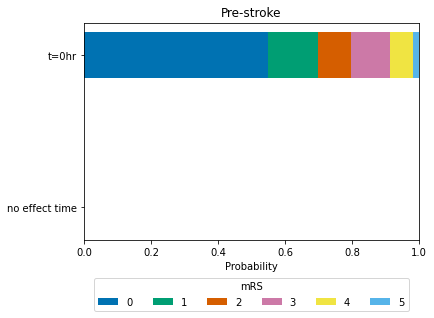

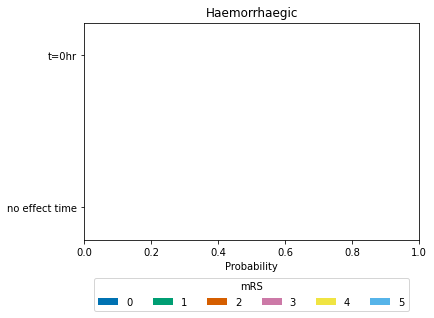

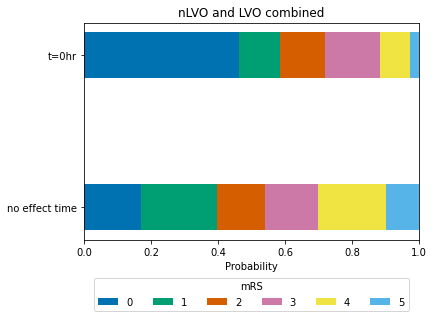

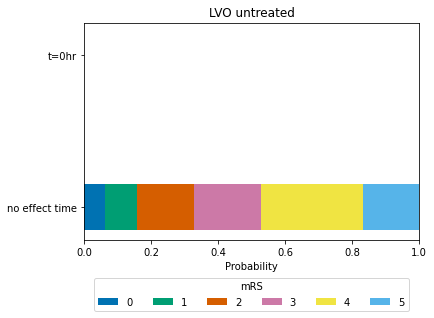

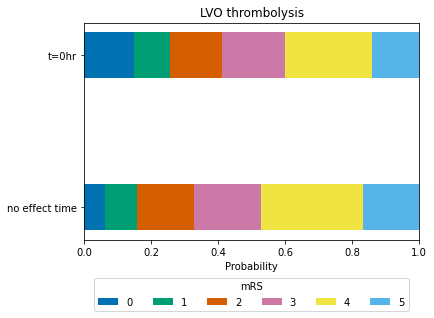

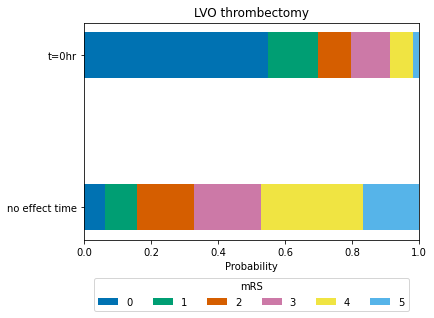

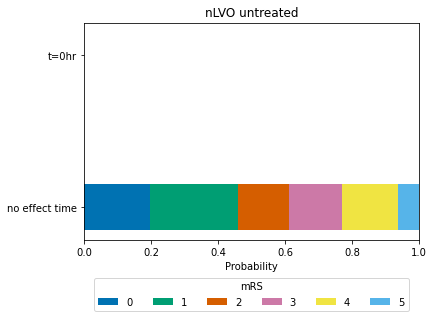

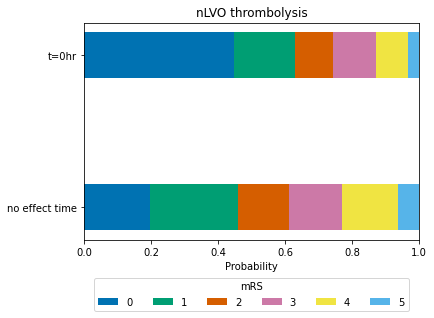

In [115]:
for data_list in big_data_list:
    
    dict_t0 = data_list[0]
    dict_tne = data_list[1]
    label = data_list[2]
    
    
    draw_horizontal_bar(dict_tne['dist'], 'no effect time')
    # draw_horizontal_bar([0.0], ' ')
    
    # Add legend now to prevent doubling all the labels:
    plt.legend(loc='center',ncol=6, title='mRS',
               bbox_to_anchor=[0.5,0.0,0.0,-0.5])   # Legend below axis.
    
    draw_horizontal_bar(dict_t0['dist'], 't=0hr')
       
    plt.xlabel('Probability')
    plt.title(label)
    plt.xlim(0,1)
    plt.show()

---

## Plot histograms

In [11]:
def plot_two_bars(mrs_prob_dist_0=[],mrs_prob_dist_F=[],title=''):
    # Compare histograms of the full data at t=0 and t=untreated:
    fig, axs = plt.subplots(1,2,figsize=(10,5),gridspec_kw={'wspace':0.04})
    ax0 = axs[0]
    axF = axs[1]
        
    ax0.bar(range(6),mrs_prob_dist_0)
    axF.bar(range(6),mrs_prob_dist_F)
    
    # Share y axis:
    for ax in [ax0,axF]:
        ax.set_xlabel('mRS')
        ax.set_ylabel('Probability')
        ax.set_xlim(-0.3,6.9)
        ax.set_ylim(0.0,0.6)
        ax.tick_params(right=True,left=True)

            
    # Add labels for clarity:
    ax0.annotate('Time 0hr',xy=(0.0,ax0.get_ylim()[1]*0.95),va='center',ha='left')
    axF.annotate('Time of no effect',xy=(0.0,axF.get_ylim()[1]*0.95),
                 va='center',ha='left')


    # Move RHS plot's y-axis labels to its right:
    axF.yaxis.tick_right()
    axF.yaxis.set_label_position('right')

    # Remind RHS axis to put tick marks on left:
    axF.tick_params(left=True)
    
    fig.suptitle(title)
    plt.show()
    
    # Sanity check:
    print('Sums of the plotted distributions (LHS, RHS): ', np.sum(mrs_prob_dist_0), np.sum(mrs_prob_dist_F))

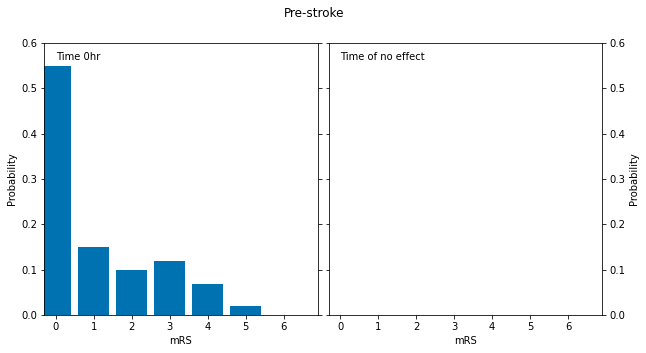

Sums of the plotted distributions (LHS, RHS):  1.0000000000000002 0.0
[0.54956818 0.14895196 0.0980681  0.11769072 0.06707674 0.0186443 ] 
 [0.0] 



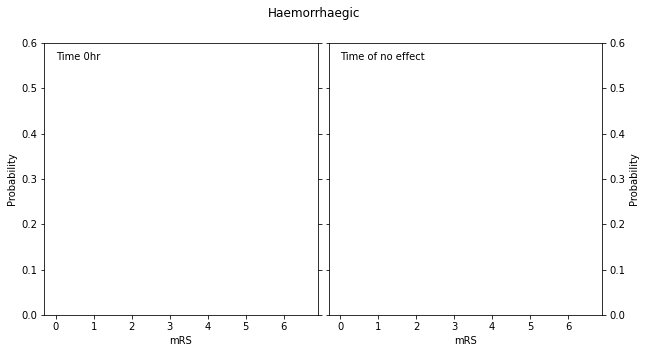

Sums of the plotted distributions (LHS, RHS):  -6 -6
[-1 -1 -1 -1 -1 -1] 
 [-1 -1 -1 -1 -1 -1] 



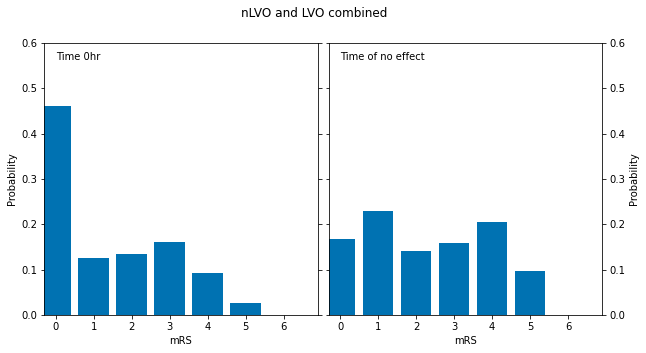

Sums of the plotted distributions (LHS, RHS):  1.0000000000000002 1.0000000000000002
[0.46101    0.12494963 0.1346828  0.16163172 0.09212051 0.02560533] 
 [0.16841001 0.2291431  0.14193672 0.15825231 0.2046646  0.09759325] 



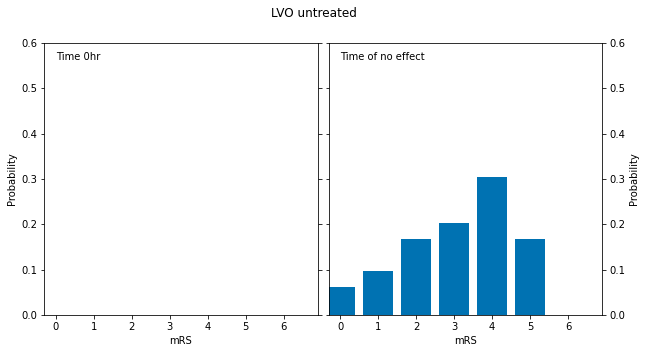

Sums of the plotted distributions (LHS, RHS):  -6 1.0
[-1 -1 -1 -1 -1 -1] 
 [0.06165228 0.0974106  0.1676942  0.20221948 0.30456227 0.16646116] 



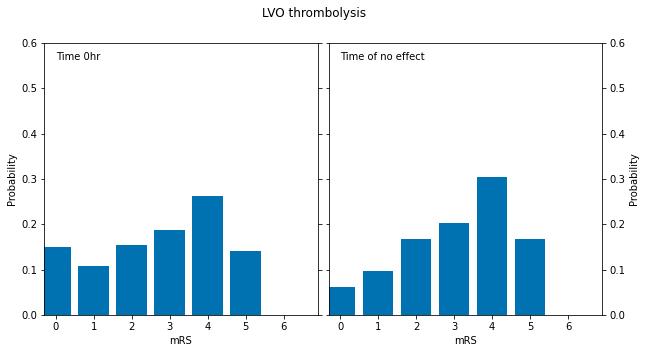

Sums of the plotted distributions (LHS, RHS):  1.0 1.0
[0.1494771437409869 0.10668804796961767 0.15516150566564757
 0.18700430472724422 0.26181487349849736 0.13985412439800624] 
 [0.06165228 0.0974106  0.1676942  0.20221948 0.30456227 0.16646116] 



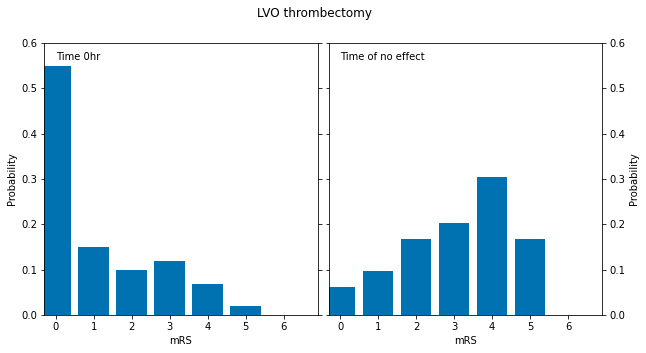

Sums of the plotted distributions (LHS, RHS):  1.0000000000000002 1.0
[0.54956818 0.14895196 0.0980681  0.11769072 0.06707674 0.0186443 ] 
 [0.06165228 0.0974106  0.1676942  0.20221948 0.30456227 0.16646116] 



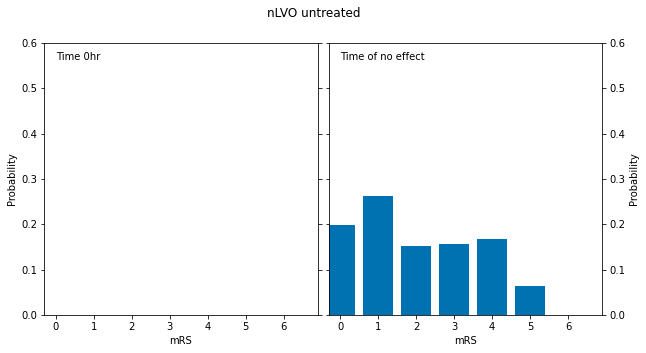

Sums of the plotted distributions (LHS, RHS):  -6 1.0000000000000002
[-1 -1 -1 -1 -1 -1] 
 [0.19802051 0.26197949 0.15192832 0.15701327 0.16812528 0.06293313] 



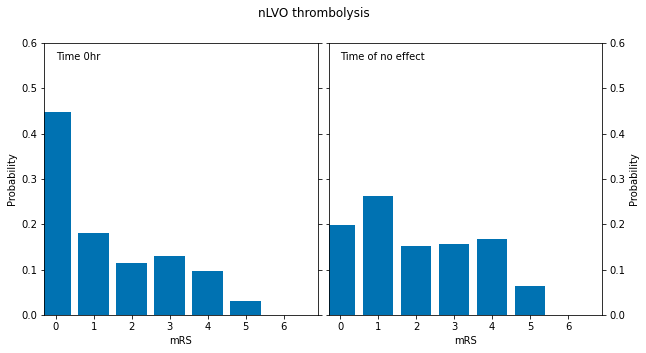

Sums of the plotted distributions (LHS, RHS):  1.0 1.0000000000000002
[0.44857840504423757 0.1814215949557623 0.11354062928179183
 0.12898698302604514 0.09610514903527713 0.031367238656885975] 
 [0.19802051 0.26197949 0.15192832 0.15701327 0.16812528 0.06293313] 



In [12]:
for data_list in big_data_list:
    
    dict_t0 = data_list[0]
    dict_tne = data_list[1]
    label = data_list[2]
    plot_two_bars(dict_t0['dist'], dict_tne['dist'], label)
    print(dict_t0['dist'], '\n', dict_tne['dist'], '\n')

---

In [13]:
def plot_two_bars_shared_axis(mrs_prob_dist_0=[],mrs_prob_dist_F=[],title=''):
    # Compare histograms of the full data at t=0 and t=untreated:
    fig, ax = plt.subplots()
        
    bar_width = 0.3
    ax.bar(np.arange(6)-0.5*bar_width, mrs_prob_dist_0, width=bar_width, label='Time 0hr')
    ax.bar(np.arange(6)+0.5*bar_width, mrs_prob_dist_F, width=bar_width, label='Time of no effect')
    
    # Share y axis:
    ax.set_xlabel('mRS')
    ax.set_ylabel('Probability')
    ax.set_xlim(-0.3,6.9)
    ax.set_ylim(0.0,0.6)
    ax.tick_params(right=True,left=True)

    plt.suptitle(title)
    plt.legend()
    plt.show()
    
    # Sanity check:
    print('Sums of the plotted distributions (LHS, RHS): ', np.sum(mrs_prob_dist_0), np.sum(mrs_prob_dist_F))

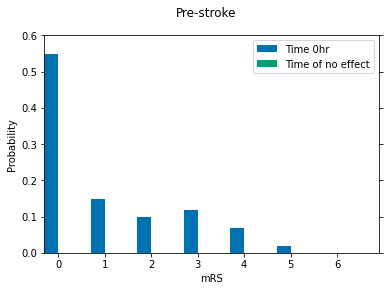

Sums of the plotted distributions (LHS, RHS):  1.0000000000000002 0.0


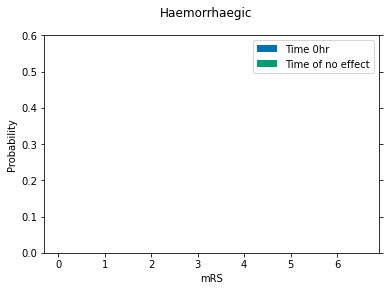

Sums of the plotted distributions (LHS, RHS):  -6 -6


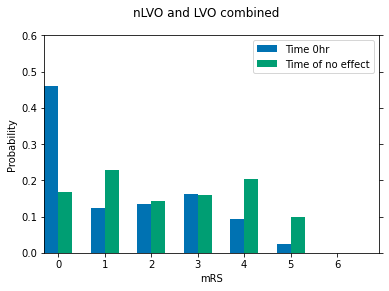

Sums of the plotted distributions (LHS, RHS):  1.0000000000000002 1.0000000000000002


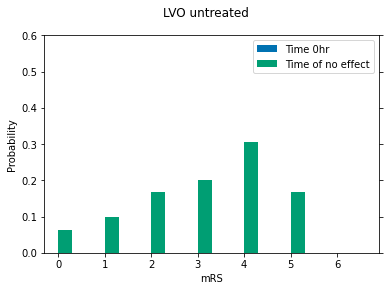

Sums of the plotted distributions (LHS, RHS):  -6 1.0


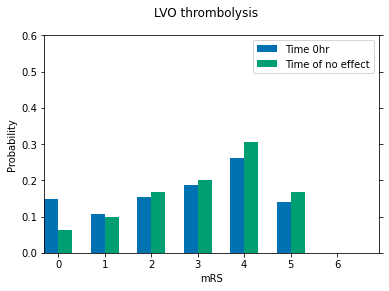

Sums of the plotted distributions (LHS, RHS):  1.0 1.0


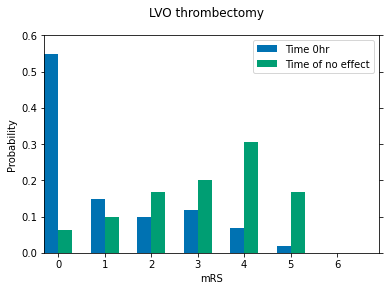

Sums of the plotted distributions (LHS, RHS):  1.0000000000000002 1.0


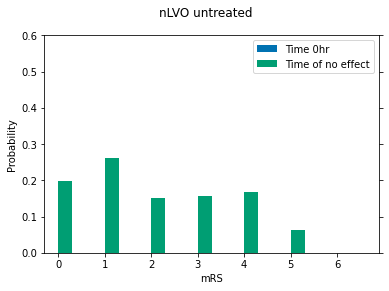

Sums of the plotted distributions (LHS, RHS):  -6 1.0000000000000002


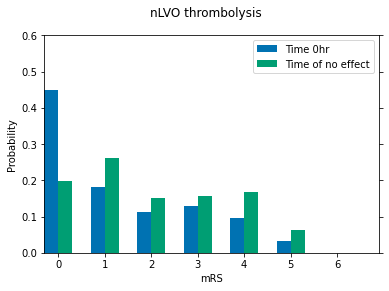

Sums of the plotted distributions (LHS, RHS):  1.0 1.0000000000000002


In [14]:
for data_list in big_data_list:
    
    dict_t0 = data_list[0]
    dict_tne = data_list[1]
    label = data_list[2]
    plot_two_bars_shared_axis(dict_t0['dist'], dict_tne['dist'], label)

---

# Distributions that require explanation

## nLVO and LVO combined - t=0

Sources: 
+ Lees et al. 2010 (no treatment distribution),
+ SAMueL-1 dataset (pre-stroke distribution),
+ Emberson et al. 2014 (odds ratio for mRS<=1 at t=1hr).

Use the "no effect" distribution with the t=1hr value from Emberson+2014 to extrapolate back and find a t=0hr point, then scale the pre-stroke bins back to match.

Use the following imported datasets and known values: 

In [15]:
mrs_prob_bins_no_treatment_nlvo_lvo = dict_no_treatment_nlvo_lvo['bins']
mrs_prob_bins_t0_treatment_pre = dict_pre_stroke['bins']

In [16]:
OR   = 1.9
t_ne = 6.3 # hours
p    = mrs_prob_bins_no_treatment_nlvo_lvo[1]

Use the odds ratio at t=1hr and probability at t=(time of No Effect) to find odds ratio `OR` and probability `p` at t=0:

In [17]:
from outcome_utilities.extrapolate_odds_ratio import extrapolate_odds_ratio

OR, p, a, b = extrapolate_odds_ratio(
    t_1=60,      OR_1=1.9,             # t=1hr data
    t_2=60*t_ne, OR_2=1,   p_2=p,      # t=t_ne data
    t_e=0 )                            # Extrapolate to time 0.

Use the new probability `p` to scale the pre-stroke bins:

In [18]:
from outcome_utilities.scale_dist import scale_dist

mrs_prob_dist_t0_treatment_nlvo_lvo, mrs_prob_bins_no_treatment_nlvo_lvo = (
    scale_dist(mrs_prob_bins_t0_treatment_pre, p, mRS_ref=1))

In [19]:
mrs_prob_dist_t0_treatment_nlvo_lvo

array([0.46101   , 0.12494963, 0.1346828 , 0.16163172, 0.09212051,
       0.02560533])

Compare with the imported data:

In [20]:
dict_t0_treatment_nlvo_lvo['dist']

array([0.46101   , 0.12494963, 0.1346828 , 0.16163172, 0.09212051,
       0.02560533])

---

## LVO - thrombolysis only - t=0

Weighted distribution of full effect `mrs_prob_dist_t0_treatment_pre` and no effect `mrs_prob_dist_no_treatment_LVO`, 0.18:0.82. (as in Holodinsky paper).

Use the following imported datasets and known values: 

In [21]:
mrs_prob_dist_t0_treatment_pre = dict_pre_stroke['dist']
mrs_prob_dist_no_treatment_lvo = dict_no_treatment_lvo['dist']

In [22]:
from outcome_utilities.mRS_datasets import (
    weight_pre_stroke_lvo_oly, weight_no_treatment_lvo_oly)

print('Weighting for pre-stroke data:',    weight_pre_stroke_lvo_oly)
print('Weighting for untreated LVO data:', weight_no_treatment_lvo_oly)

Weighting for pre-stroke data: 0.18
Weighting for untreated LVO data: 0.82


Apply the weights:

In [23]:
mrs_prob_dist_t0_treatment_lvo_oly = (
    (weight_pre_stroke_lvo_oly   * mrs_prob_dist_t0_treatment_pre) + 
    (weight_no_treatment_lvo_oly * mrs_prob_dist_no_treatment_lvo) )

In [24]:
mrs_prob_dist_t0_treatment_lvo_oly

array([0.14947714, 0.10668805, 0.15516151, 0.1870043 , 0.26181487,
       0.13985412])

Compare this with the imported distribution:

In [25]:
dict_t0_treatment_lvo_oly['dist']

array([0.1494771437409869, 0.10668804796961767, 0.15516150566564757,
       0.18700430472724422, 0.26181487349849736, 0.13985412439800624],
      dtype=object)

### Plot the weighting

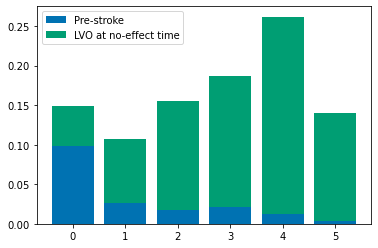

In [26]:
weighted_pre = weight_pre_stroke_lvo_oly   * mrs_prob_dist_t0_treatment_pre
weighted_lvo = weight_no_treatment_lvo_oly * mrs_prob_dist_no_treatment_lvo

bars = plt.bar(range(6), weighted_pre, label='Pre-stroke' )

# Draw the second set of bars on top of the first using 'tops' list:
tops = bars.datavalues
plt.bar(range(6), weighted_lvo, bottom=tops, label='LVO at no-effect time' )

plt.legend()
plt.show()

---

## nLVO - untreated - time of no effect

Estimate from weighted subtraction of Goyal+2016 data from the Lees+2010 data.

In [55]:
mrs_prob_dist_no_treatment_Lees = dict_no_treatment_nlvo_lvo['dist']
mrs_prob_dist_no_treatment_LVO  = dict_no_treatment_lvo['dist']

In [56]:
from outcome_utilities.mRS_datasets import (
    weight_no_treatment_nlvo_lvo, weight_no_treatment_lvo)

print('Weights:')
print('untreated nLVO and LVO data:', weight_no_treatment_nlvo_lvo)
print('untreated LVO data:         ', weight_no_treatment_lvo)

Weights:
untreated nLVO and LVO data: 1.0
untreated LVO data:          -0.4


In [57]:
mrs_prob_dist_no_treatment_nLVO = (
    (weight_no_treatment_nlvo_lvo * mrs_prob_dist_no_treatment_Lees) + 
    (weight_no_treatment_lvo      * mrs_prob_dist_no_treatment_LVO) )

Currently the bins are unlikely to sum to 1 as required, so they must be normalised:

In [58]:
mrs_prob_dist_no_treatment_nLVO = (mrs_prob_dist_no_treatment_nLVO / 
                                   np.sum(mrs_prob_dist_no_treatment_nLVO))

In [59]:
mrs_prob_dist_no_treatment_nLVO

array([0.23958184, 0.31696477, 0.12476506, 0.12894086, 0.13806616,
       0.05168132])

Check whether mRS<=1 value is a match for the 46% value from Holodinsky+2018.

In [60]:
mrs_prob_bins_no_treatment_nLVO = np.cumsum(mrs_prob_dist_no_treatment_nLVO)

In [61]:
mrs_prob_bins_no_treatment_nLVO[1]

0.5565466025542539

Scale the bins to match the value from Holodinsky+2018, $P(mRS\leq1, t=T_0)=0.46$.

In [62]:
mRS_ref_nLVO = 1
p_ref_nLVO   = 0.46

In [63]:
from outcome_utilities.scale_dist import scale_dist

mrs_prob_dist_no_treatment_nLVO, mrs_prob_bins_no_treatment_nLVO = (
    scale_dist(mrs_prob_bins_no_treatment_nLVO, p_ref_nLVO, mRS_ref=mRS_ref_nLVO))

In [64]:
mrs_prob_dist_no_treatment_nLVO

array([0.19802051, 0.26197949, 0.15192832, 0.15701327, 0.16812528,
       0.06293313])

In [65]:
mrs_prob_bins_no_treatment_nLVO

array([0.19802051, 0.46      , 0.61192832, 0.76894159, 0.93706687,
       1.        ])

Compare with the imported data:

In [66]:
dict_no_treatment_nlvo['dist']

array([0.19802051, 0.26197949, 0.15192832, 0.15701327, 0.16812528,
       0.06293313])

---

## nLVO - thrombolysis

## t=0 distribution

Weighted distribution of the pre-stroke and "no effect" distributions.

Find the weighting that results in $P(mRS<=1, t=0)=0.63$ (from Holodinsky+2018).

In [89]:
from outcome_utilities.mRS_datasets import weight_pre_stroke_nlvo_oly, weight_no_treatment_nlvo_oly

print(weight_pre_stroke_nlvo_oly, weight_no_treatment_nlvo_oly)

0.7127280650232234 0.2872719349767766


In [83]:
mrs_prob_bins_no_treatment_nLVO_oly = dict_no_treatment_nlvo_oly['bins']
mrs_prob_bins_t0_treatment_pre = dict_pre_stroke['bins']

mrs_prob_dist_no_treatment_nLVO_oly = dict_no_treatment_nlvo_oly['dist']
mrs_prob_dist_t0_treatment_pre = dict_pre_stroke['dist']

In [90]:
# Define the weights 'w':
weight_pre_stroke_nlvo_oly = (
    (0.63 - mrs_prob_bins_no_treatment_nLVO_oly[1]) / 
    (mrs_prob_bins_t0_treatment_pre[1] - mrs_prob_bins_no_treatment_nLVO_oly[1])
    )
weight_no_treatment_nlvo_oly = 1.0 - weight_pre_stroke_nlvo_oly

print('Weights: ', weight_pre_stroke_nlvo_oly, weight_no_treatment_nlvo_oly)


Weights:  0.7127280650232234 0.2872719349767766


In [91]:
mrs_prob_dist_t0_treatment_nLVO_oly = (
    (weight_pre_stroke_nlvo_oly   * mrs_prob_dist_t0_treatment_pre) + 
    (weight_no_treatment_nlvo_oly * mrs_prob_dist_no_treatment_nLVO_oly) )

# mrs_prob_dist_t0_treatment_nLVO_oly = np.diff(np.append([0.0],mrs_prob_bins_t0_treatment_nLVO_oly))
mrs_prob_bins_t0_treatment_nLVO_oly = np.cumsum(mrs_prob_dist_t0_treatment_nLVO_oly)


In [92]:
mrs_prob_dist_t0_treatment_nLVO_oly

array([0.44857841, 0.18142159, 0.11354063, 0.12898698, 0.09610515,
       0.03136724])

In [93]:
mrs_prob_bins_t0_treatment_nLVO_oly

array([0.44857841, 0.63      , 0.74354063, 0.87252761, 0.96863276,
       1.        ])

Compare with the imported data:

In [94]:
dict_t0_treatment_nlvo_oly['dist']

array([0.44857840504423757, 0.1814215949557623, 0.11354062928179183,
       0.12898698302604514, 0.09610514903527713, 0.031367238656885975],
      dtype=object)

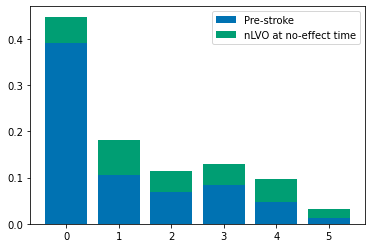

In [95]:
weighted_pre  = weight_pre_stroke_nlvo_oly   * mrs_prob_dist_t0_treatment_pre
weighted_nlvo_oly = weight_no_treatment_nlvo_oly * mrs_prob_dist_no_treatment_nLVO_oly

bars = plt.bar(range(6), weighted_pre, label='Pre-stroke' )

# Draw the second set of bars on top of the first using 'tops' list:
tops = bars.datavalues
plt.bar(range(6), weighted_nlvo_oly, bottom=tops, label='nLVO at no-effect time' )

plt.legend()
plt.show()

In [82]:
print(weight_pre_stroke_nlvo_oly,np.sum(weighted_pre))

0.09786465119634728 0.0978646511963473


---

### References:

- Holodinsky+2018
- Goyal+2016
- Emberson+2014
- Lees+2010
